In [1]:
# 154p
from PIL import Image

ModuleNotFoundError: No module named 'PIL'

In [2]:
!pip install Pillow

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.4 MB/s eta 0:00:00


In [38]:
# 테스트 데이터 로드
from PIL import Image

In [39]:
import os

In [40]:
import numpy as np

In [41]:
data_dir = "./images/"
files = os.listdir(data_dir)

In [42]:
images = []
for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

In [43]:
# 테스트 데이터 전처리
import tensorflow as tf

In [44]:
resized_images = np.array(np.zeros((len(images), 224, 224, 3)))
for i in range(len(images)):
    resized_images[i] = tf.image.resize(images[i], [224, 224])

preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

In [45]:
# 모델 생성 및 추론
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")

In [46]:
y_pred = mobilenet_imagenet_model.predict(preprocessed_images)
topK = 1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top = topK)

1/1 [==============================] - 1s 672ms/step


In [47]:
# 추론 결과 확인
from matplotlib import pyplot as plt

In [48]:
import numpy as np

In [49]:
!pip install matplotlib

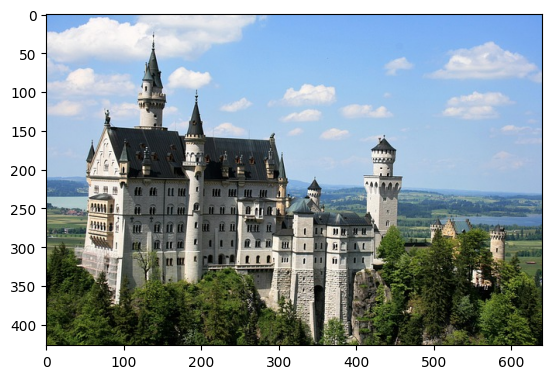

castle(97.9%)


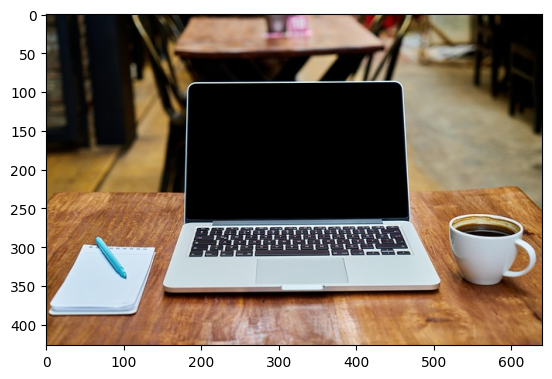

notebook(49.7%)


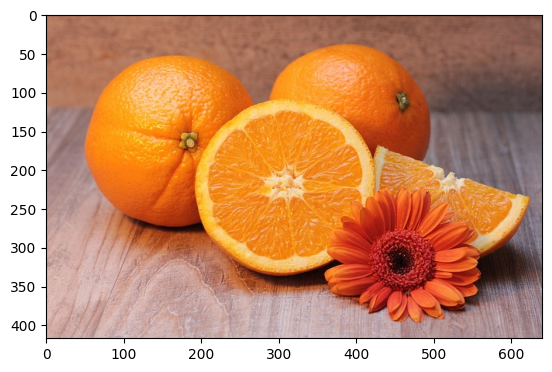

orange(98.4%)


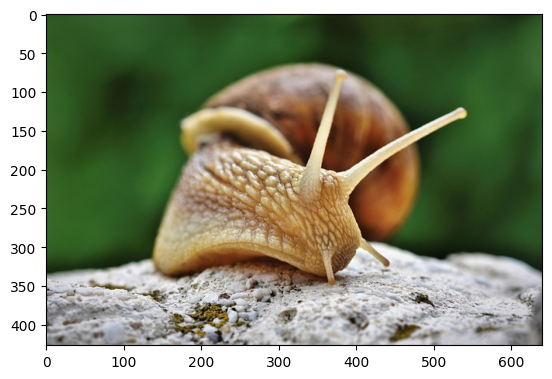

snail(92.0%)


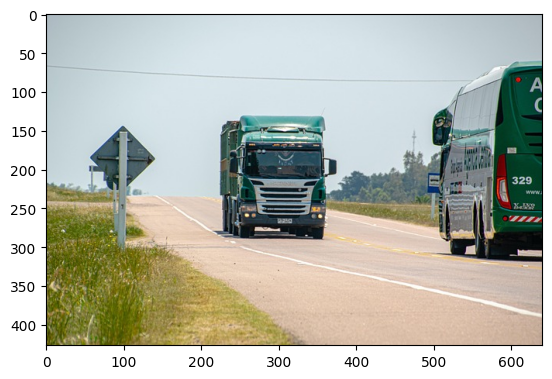

trailer_truck(23.8%)


In [50]:
for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()

    for k in range(topK):
        print(f'{y_pred_top[i][k][1]}({round(y_pred_top[i][k][2]*100, 1)}%)')